## BASEBALL CASE STUDY 

#### Information about the dataset:
This dataset utilizes data from 2014 Major League Baseball seasons in order to develop an algorithm that predicts the number of wins for a given team in the 2015 season based on several different indicators of success.There are 16 different features that will be used as the inputs to the machine learning and the output will be a value that represents the number of wins.
Input and Output features:

#### Input features: 
Runs, At Bats, Hits, Doubles, Triples, Homeruns, Walks, Strikeouts,Stolen Bases, Runs Allowed, Earned Runs, Earned Run Average (ERA), Shutouts, Saves, and Errors

#### Output: 
Number of predicted wins (W)

In [143]:
# Importing Libraries 

#numpy and pandas
import numpy as np
import pandas as pd

# visualization 
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# feature_engineering dependency
import feature_engine

import warnings
warnings.filterwarnings('ignore')


In [144]:
#Importing datasets
df = pd.read_csv('baseball.csv')
df.head()

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
0,95,724,5575,1497,300,42,139,383,973,104,641,601,3.73,2,8,56,88
1,83,696,5467,1349,277,44,156,439,1264,70,700,653,4.07,2,12,45,86
2,81,669,5439,1395,303,29,141,533,1157,86,640,584,3.67,11,10,38,79
3,76,622,5533,1381,260,27,136,404,1231,68,701,643,3.98,7,9,37,101
4,74,689,5605,1515,289,49,151,455,1259,83,803,746,4.64,7,12,35,86


In [145]:
# replacing with Complete word for easy notation and understanding 
df.columns = 'Wins,Runs,At_Bats,Hits,Doubles,Triples,Homeruns,Walks,Strikeouts,Stolen_Bases,Runs_Allowed,Earned_Runs,Earned_Run_Average_(ERA),Complete_Game,Shutouts,Saves,Errors'.split(',')

df.head(5)

,Wins,Runs,At_Bats,Hits,Doubles,Triples,Homeruns,Walks,Strikeouts,Stolen_Bases,Runs_Allowed,Earned_Runs,Earned_Run_Average_(ERA),Complete_Game,Shutouts,Saves,Errors
0,95,724,5575,1497,300,42,139,383,973,104,641,601,3.73,2,8,56,88
1,83,696,5467,1349,277,44,156,439,1264,70,700,653,4.07,2,12,45,86
2,81,669,5439,1395,303,29,141,533,1157,86,640,584,3.67,11,10,38,79
3,76,622,5533,1381,260,27,136,404,1231,68,701,643,3.98,7,9,37,101
4,74,689,5605,1515,289,49,151,455,1259,83,803,746,4.64,7,12,35,86


In [146]:
#Dataset details 
# more infor on the dataset 
print('Size of dataset \n ',df.shape,'\n')
print('Details dataset\n' ,df.info(),'\n')
print('Checking for NULL/Missing values \n',df.isna().sum())


Size of dataset 
  (30, 17) 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 17 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Wins                      30 non-null     int64  
 1   Runs                      30 non-null     int64  
 2   At_Bats                   30 non-null     int64  
 3   Hits                      30 non-null     int64  
 4   Doubles                   30 non-null     int64  
 5   Triples                   30 non-null     int64  
 6   Homeruns                  30 non-null     int64  
 7   Walks                     30 non-null     int64  
 8   Strikeouts                30 non-null     int64  
 9   Stolen_Bases              30 non-null     int64  
 10  Runs_Allowed              30 non-null     int64  
 11  Earned_Runs               30 non-null     int64  
 12  Earned_Run_Average_(ERA)  30 non-null     float64
 13  Complete_Game             30 non-null

Size of dataset :(30, 17)
Null values : NO 
DATA TYPE :all INT type but one [Earned_Run_Average_(ERA)]

In [147]:
df.describe()

,Wins,Runs,At_Bats,Hits,Doubles,Triples,Homeruns,Walks,Strikeouts,Stolen_Bases,Runs_Allowed,Earned_Runs,Earned_Run_Average_(ERA),Complete_Game,Shutouts,Saves,Errors
count,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.00000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000
mean,80.966667,688.233333,5516.266667,1403.533333,274.733333,31.300000,163.633333,469.100000,1248.20000,83.500000,688.233333,635.833333,3.956333,3.466667,11.300000,43.066667,94.333333
std,10.453455,58.761754,70.467372,57.140923,18.095405,10.452355,31.823309,57.053725,103.75947,22.815225,72.108005,70.140786,0.454089,2.763473,4.120177,7.869335,13.958889
min,63.000000,573.000000,5385.000000,1324.000000,236.000000,13.000000,100.000000,375.000000,973.00000,44.000000,525.000000,478.000000,2.940000,0.000000,4.000000,28.000000,75.000000
25%,74.000000,651.250000,5464.000000,1363.000000,262.250000,23.000000,140.250000,428.250000,1157.50000,69.000000,636.250000,587.250000,3.682500,1.000000,9.000000,37.250000,86.000000
50%,81.000000,689.000000,5510.000000,1382.500000,275.500000,31.000000,158.500000,473.000000,1261.50000,83.500000,695.500000,644.500000,4.025000,3.000000,12.000000,42.000000,91.000000
75%,87.750000,718.250000,5570.000000,1451.500000,288.750000,39.000000,177.000000,501.250000,1311.50000,96.500000,732.500000,679.250000,4.220000,5.750000,13.000000,46.750000,96.750000
max,100.000000,891.000000,5649.000000,1515.000000,308.000000,49.000000,232.000000,570.000000,1518.00000,134.000000,844.000000,799.000000,5.040000,11.000000,21.000000,62.000000,126.000000


In [148]:
# Let's check the correlation between the features in the datset.
df_corr = df.corr()
df_corr

,Wins,Runs,At_Bats,Hits,Doubles,Triples,Homeruns,Walks,Strikeouts,Stolen_Bases,Runs_Allowed,Earned_Runs,Earned_Run_Average_(ERA),Complete_Game,Shutouts,Saves,Errors
Wins,1.000000,0.430751,-0.087947,0.037612,0.427797,-0.251118,0.307407,0.484342,0.111850,-0.157234,-0.812952,-0.809435,-0.819600,0.080533,0.471805,0.666530,-0.089485
Runs,0.430751,1.000000,0.319464,0.482856,0.560084,-0.070072,0.671283,0.402452,-0.054726,0.081367,-0.041623,-0.041245,-0.049281,0.232042,-0.103274,-0.096380,-0.023262
At_Bats,-0.087947,0.319464,1.000000,0.739122,0.453370,0.435422,-0.066983,-0.136414,-0.106022,0.372618,0.316010,0.309686,0.255551,-0.080876,-0.197321,-0.106367,0.316743
Hits,0.037612,0.482856,0.739122,1.000000,0.566847,0.478694,-0.090855,-0.118281,-0.398830,0.413444,0.224324,0.252489,0.231172,0.147955,-0.145559,-0.130371,-0.033173
Doubles,0.427797,0.560084,0.453370,0.566847,1.000000,0.220490,0.056292,0.302700,-0.150752,0.195027,-0.218160,-0.235531,-0.254854,0.306675,0.057998,0.171576,0.105754
Triples,-0.251118,-0.070072,0.435422,0.478694,0.220490,1.000000,-0.430915,-0.454949,-0.141196,0.457437,0.314125,0.340225,0.330951,-0.065898,-0.041396,-0.142370,0.126678
Homeruns,0.307407,0.671283,-0.066983,-0.090855,0.056292,-0.430915,1.000000,0.425691,0.359923,-0.136567,-0.103903,-0.085922,-0.090917,0.156502,-0.019119,-0.028540,-0.207597
Walks,0.484342,0.402452,-0.136414,-0.118281,0.302700,-0.454949,0.425691,1.000000,0.233652,-0.098347,-0.416445,-0.452663,-0.459832,0.462478,0.426004,0.099445,-0.075685
Strikeouts,0.111850,-0.054726,-0.106022,-0.398830,-0.150752,-0.141196,0.359923,0.233652,1.000000,0.030968,-0.129745,-0.161612,-0.180368,-0.093418,0.237721,0.126297,0.155133
Stolen_Bases,-0.157234,0.081367,0.372618,0.413444,0.195027,0.457437,-0.136567,-0.098347,0.030968,1.000000,0.132290,0.143068,0.126063,-0.020783,-0.106563,-0.183418,0.079149


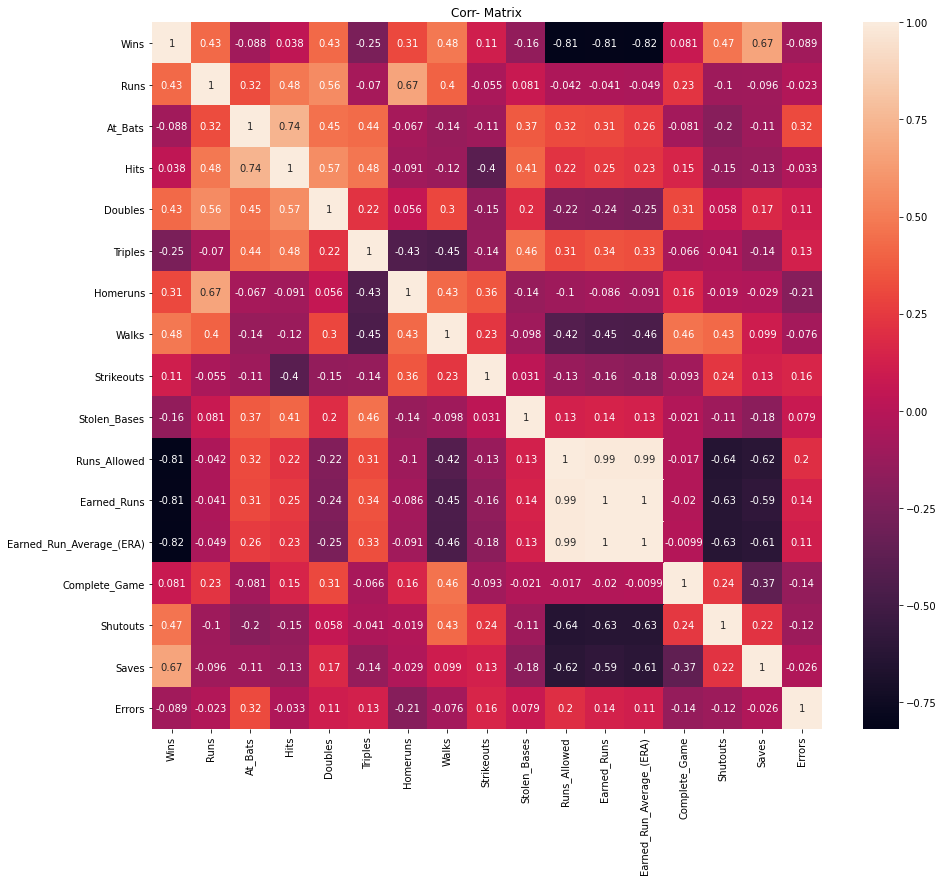

In [149]:
#Visualization of correlarion and heat map 
df_corr = df.corr()
plt.figure(figsize=[15,13])
sns.heatmap(df_corr,annot=True)
plt.title('Corr- Matrix')
plt.show()

In [150]:
df.corr()['Earned_Runs'].sort_values(ascending =False)

Earned_Runs                 1.000000
Earned_Run_Average_(ERA)    0.997248
Runs_Allowed                0.991018
Triples                     0.340225
At_Bats                     0.309686
Hits                        0.252489
Stolen_Bases                0.143068
Errors                      0.136921
Complete_Game              -0.020221
Runs                       -0.041245
Homeruns                   -0.085922
Strikeouts                 -0.161612
Doubles                    -0.235531
Walks                      -0.452663
Saves                      -0.589663
Shutouts                   -0.630192
Wins                       -0.809435
Name: Earned_Runs, dtype: float64

Note that there are three highly correlated features.
They are as follows:
Runs Allowed
Earned Runs
Earned_Runes_Average_(AVG)

#### Interprertation:
1. For a dataset with 16 features 30 rows will cause overfitting of data leading to high varirance
2. The best poption will be doa proper feature selection and reduce the no of feature for  modelling to reduce the risk of high varirance 


In [153]:
# Dealing outliers in the dataset

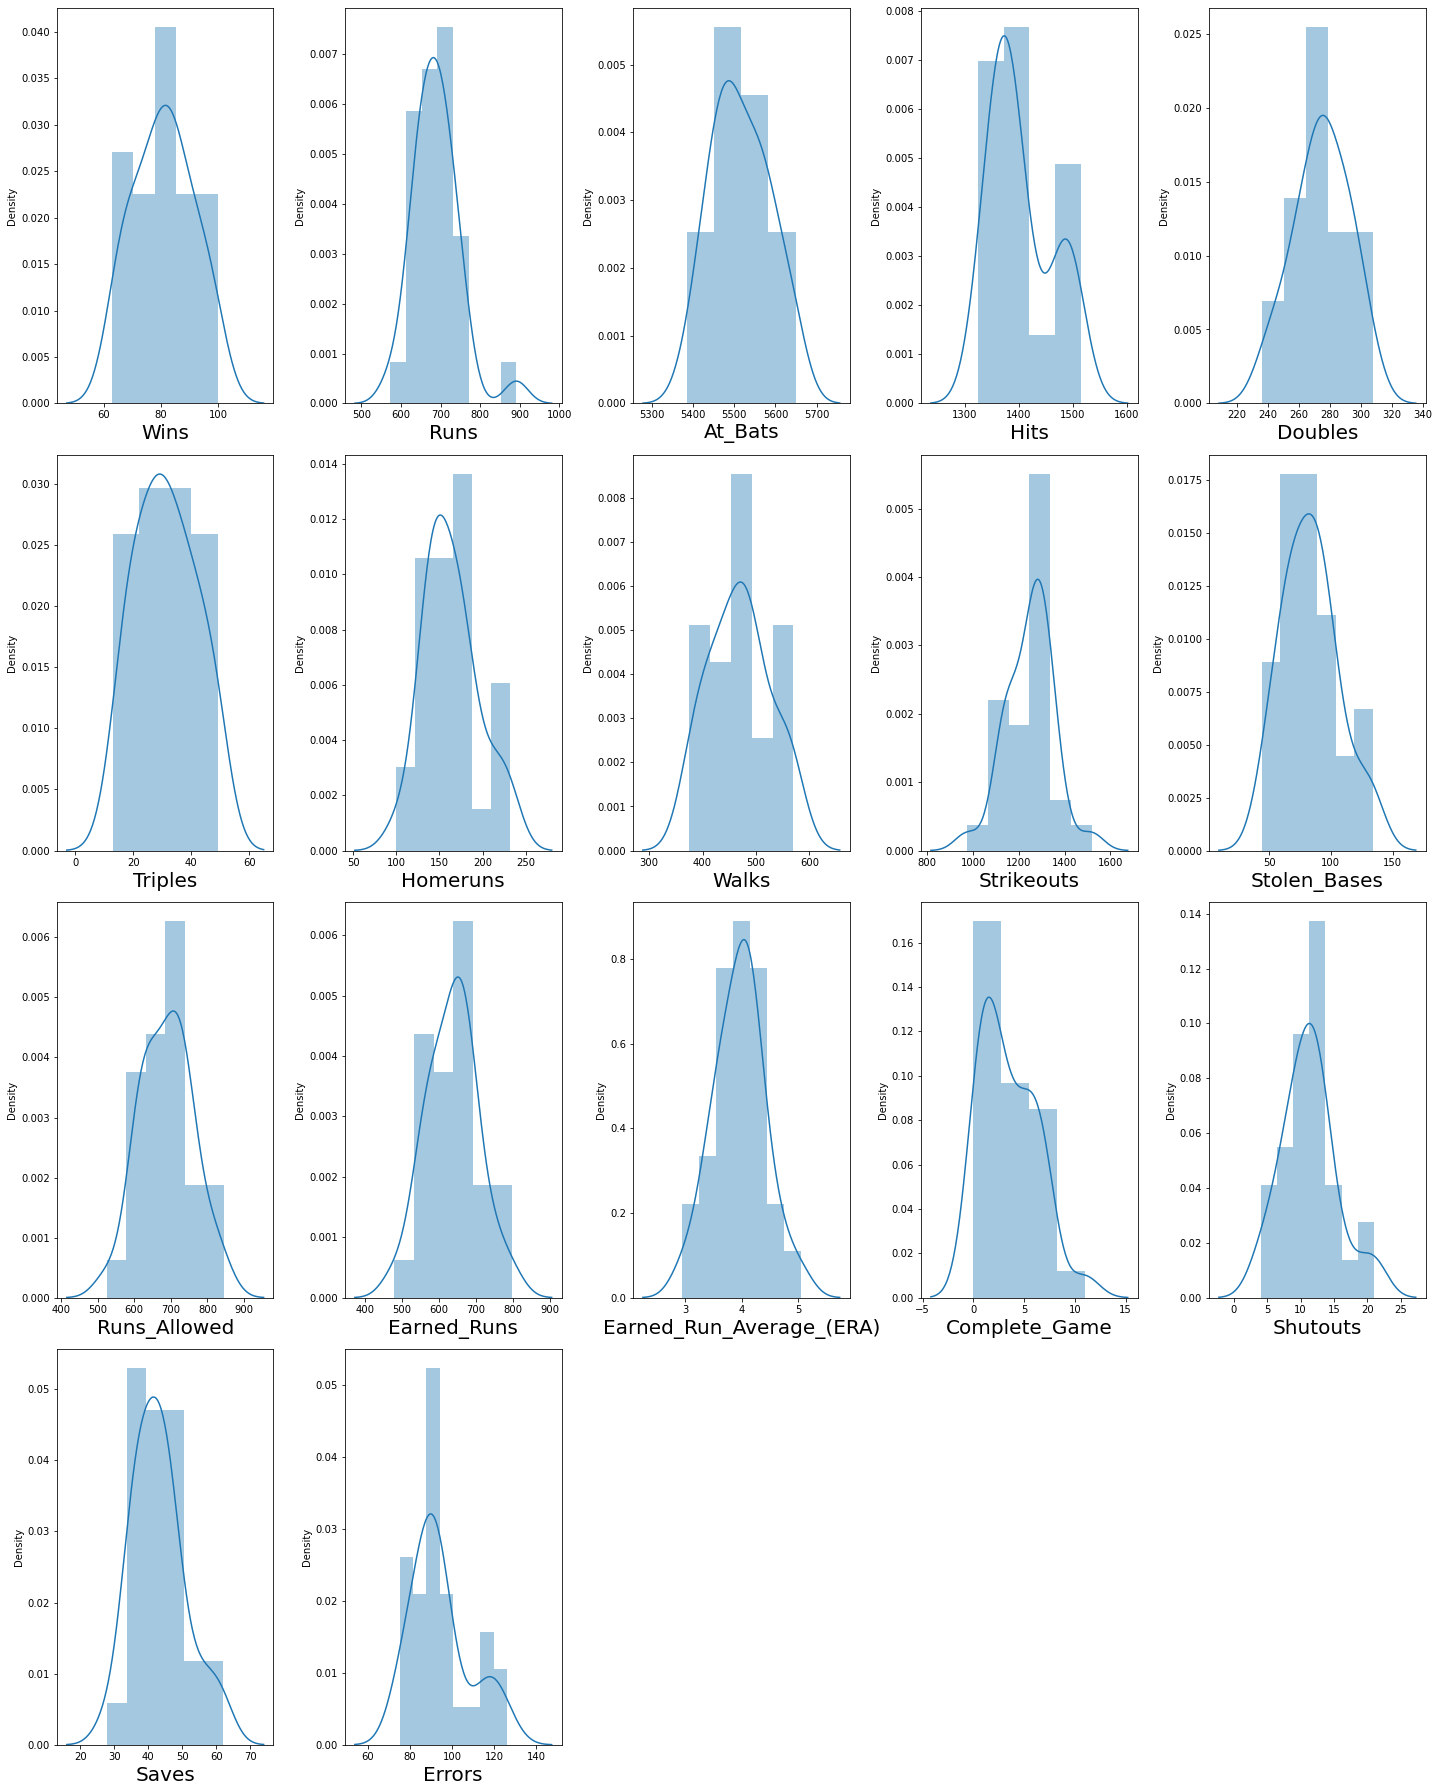

In [154]:
#Visualizartion disitplot  
plt.figure(figsize =(20,25))
plt_num =1
for i in df:
    if plt_num<=17:
        ax  =plt.subplot(4,5,plt_num)
        sns.distplot(df[i])
        plt.xlabel(i, fontsize =20)
    plt_num +=1
plt.tight_layout()

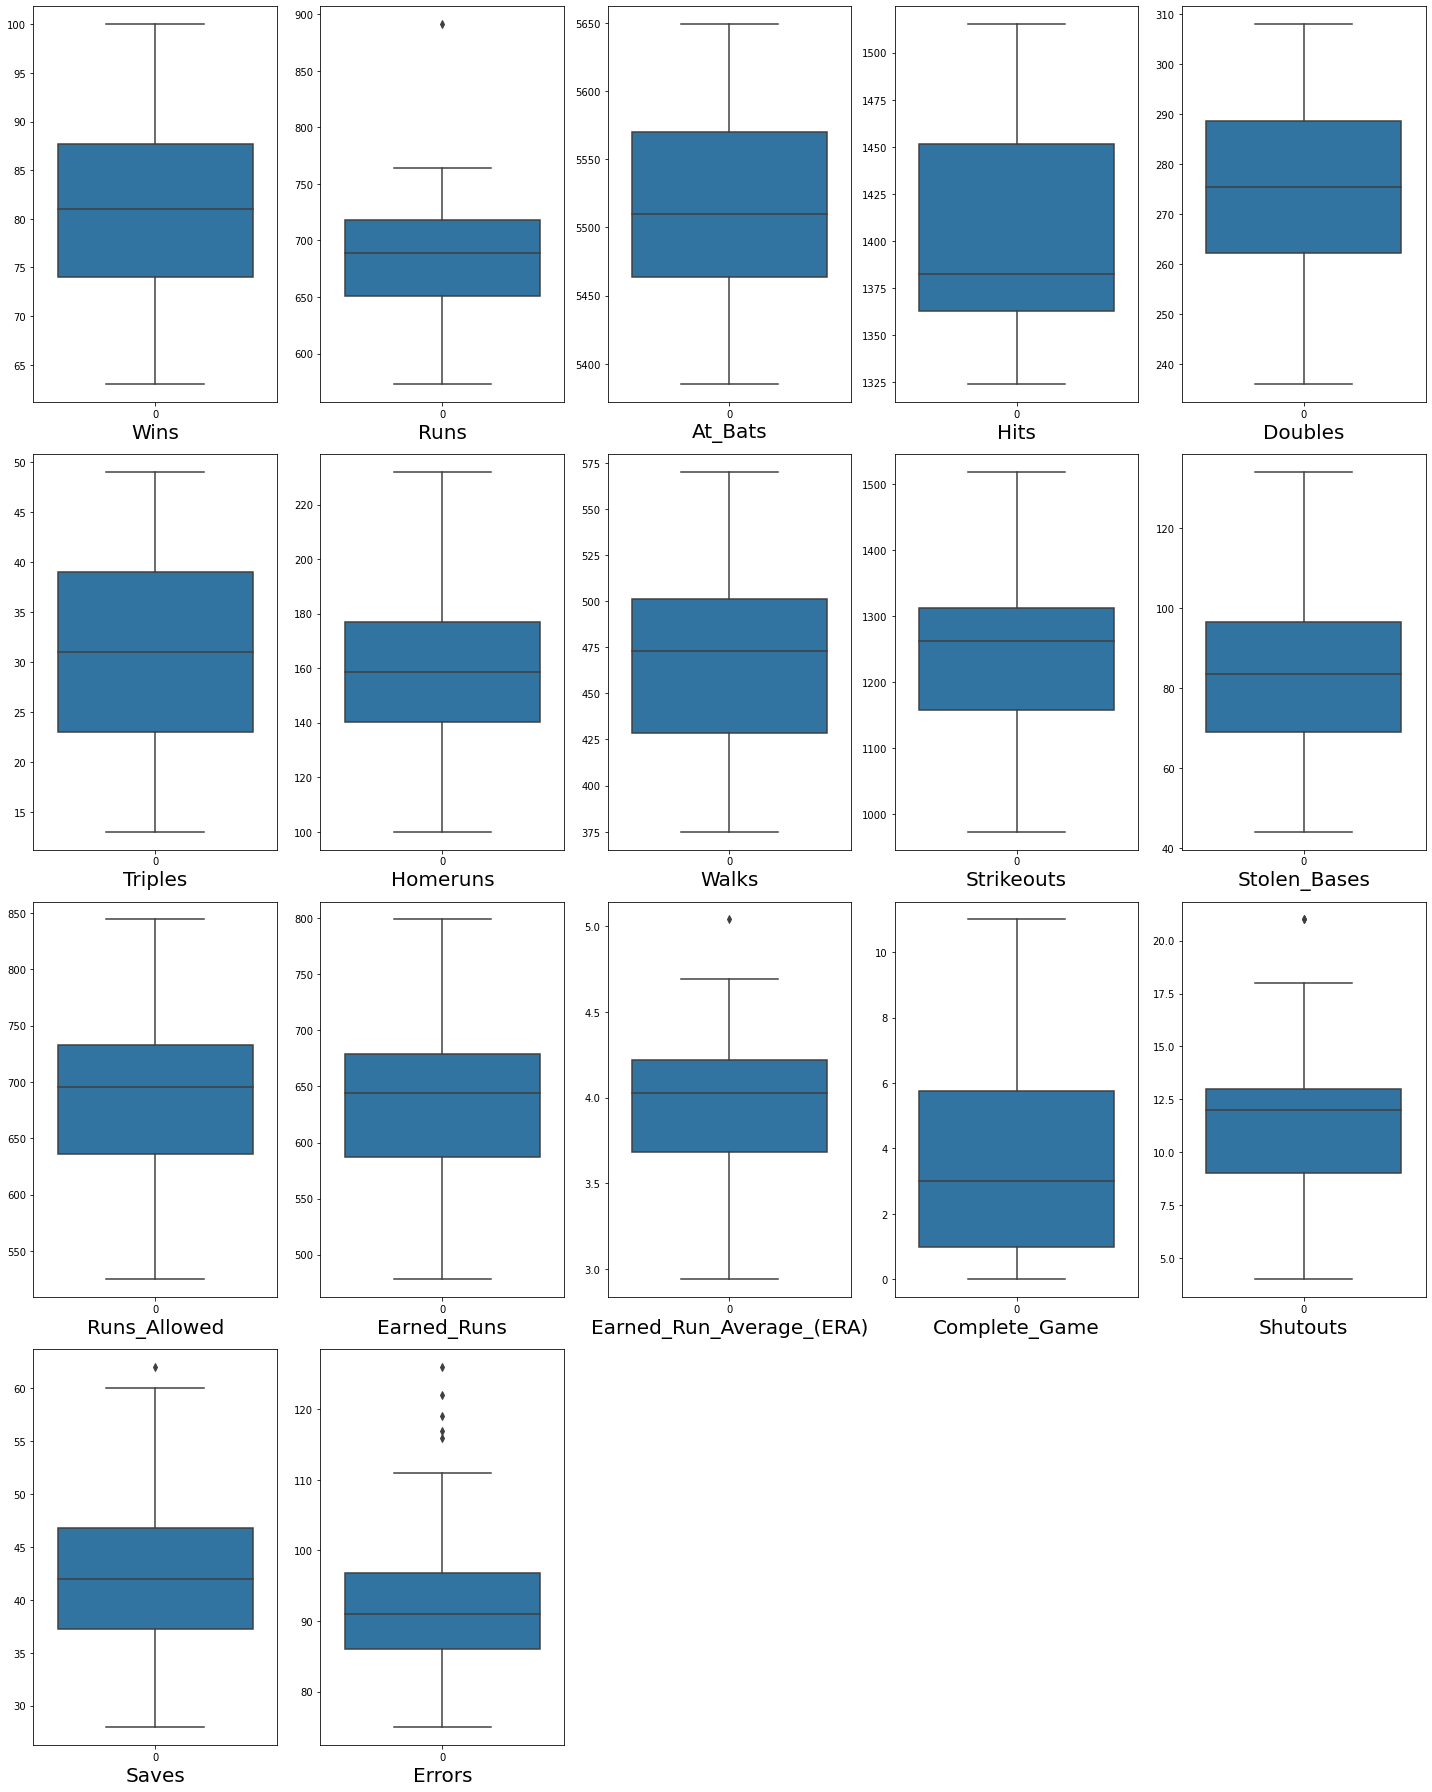

In [155]:
#Visualizartion boxplot 
plt.figure(figsize =(20,25))
plt_num =1
for i in df:
    if plt_num<=17:
        ax  =plt.subplot(4,5,plt_num)
        sns.boxplot(data =df[i],orient ='v')
        plt.xlabel(i, fontsize =20)
    plt_num +=1
plt.tight_layout()

In [156]:
# addressing outliers using the IOR:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1

df_cleaned = df[~((df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR))).any(axis=1)]

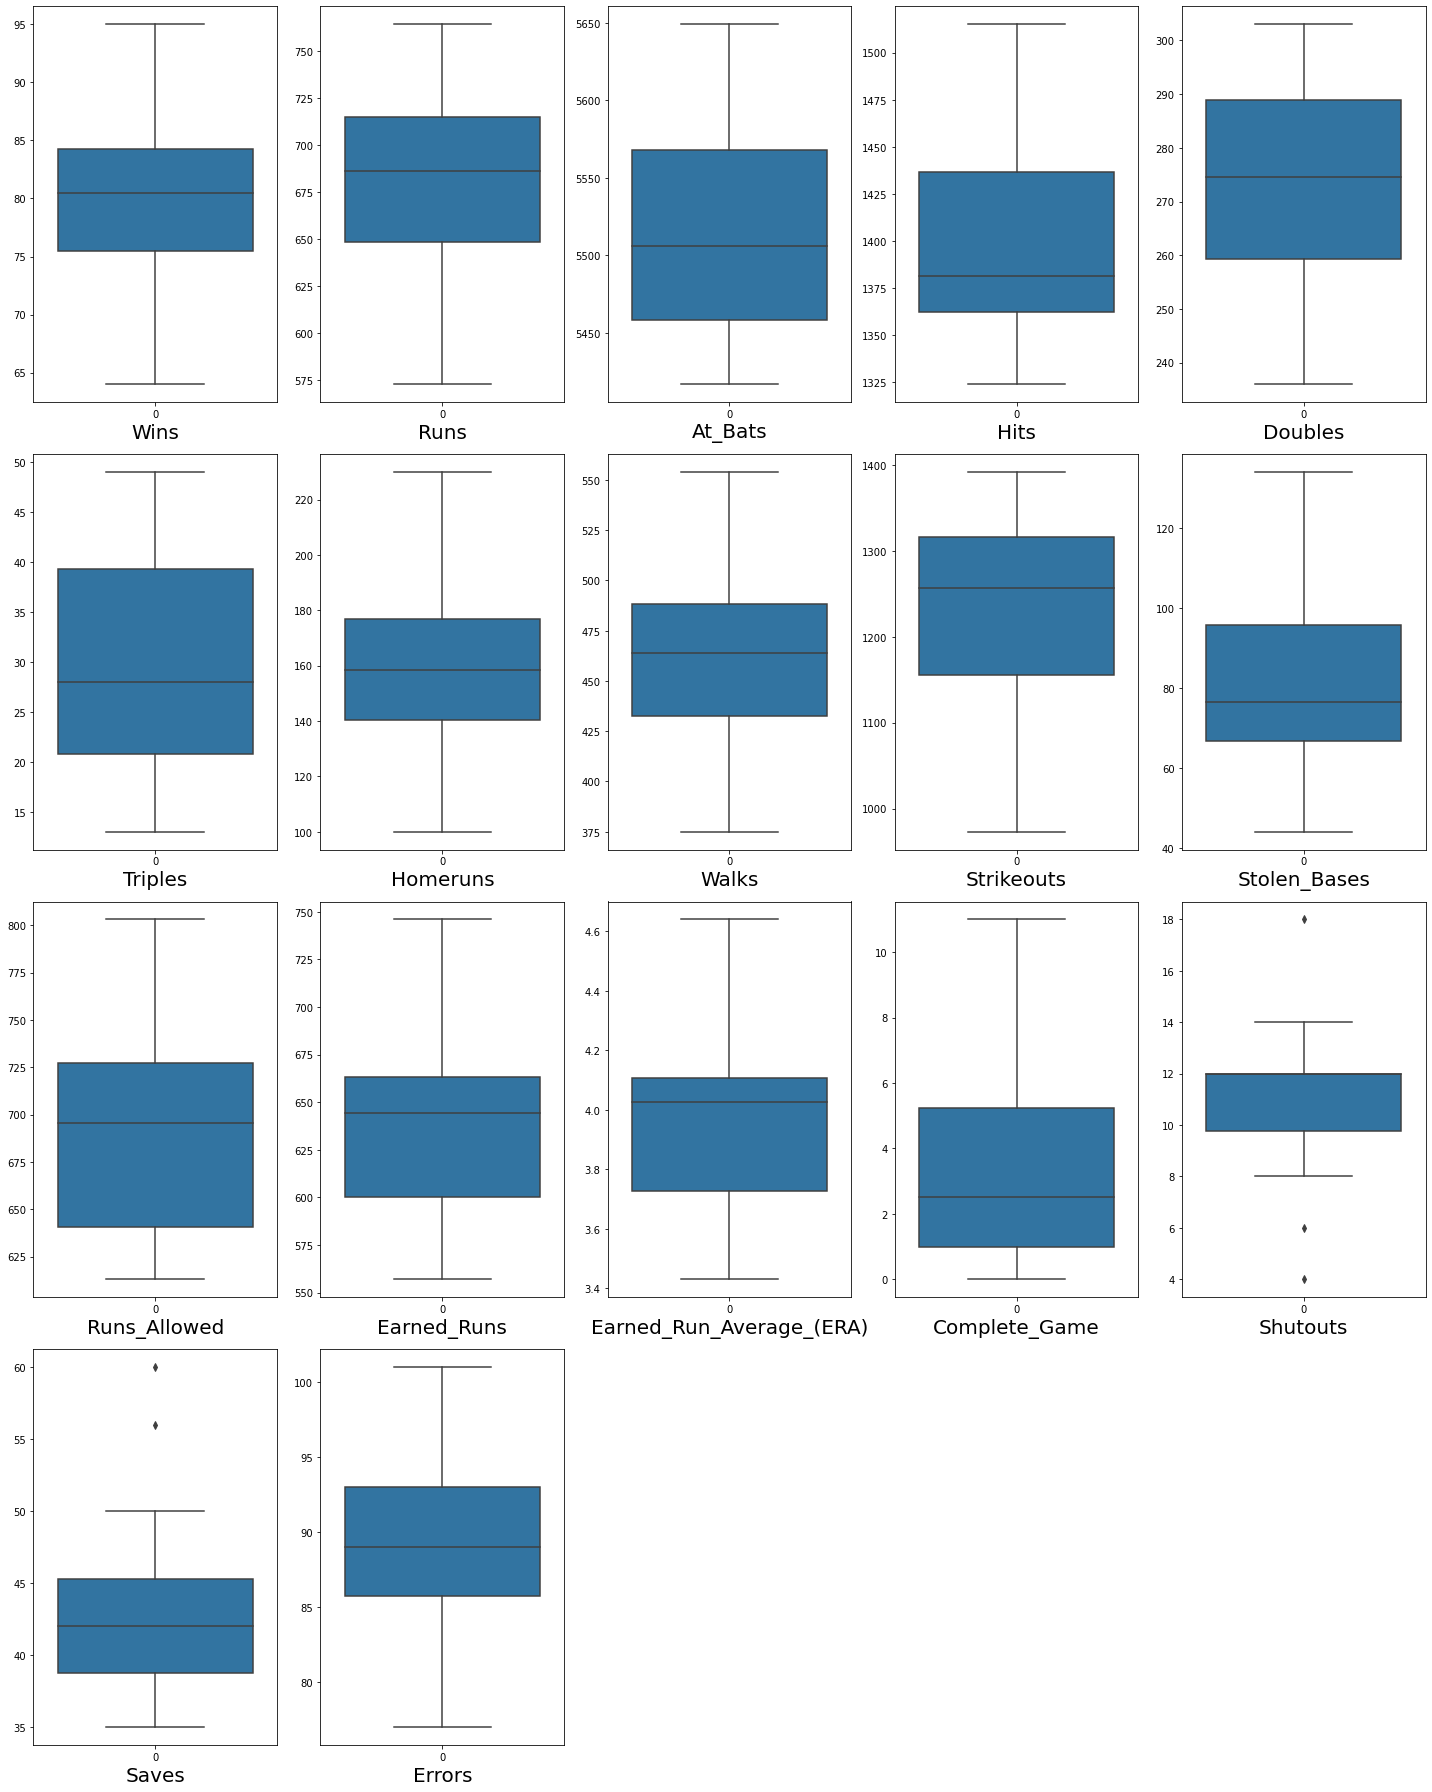

In [157]:
#Visualizartion boxplot for df_cleaned
plt.figure(figsize =(20,25))
plt_num =1
for i in df_cleaned:
    if plt_num<=17:
        ax  =plt.subplot(4,5,plt_num)
        sns.boxplot(data =df_cleaned[i],orient ='v')
        plt.xlabel(i, fontsize =20)
    plt_num +=1
plt.tight_layout()

In [158]:
print('Original dataset \n',len(df)) 
print('Cleaned dataset \n',len(df_cleaned))

Original dataset 
 30
Cleaned dataset 
 20


We don't  have the luxury  to loose so much of data thuswe will use original data set 

In [159]:
# let's check the skewness of the features in the dataset:
df.skew()

Wins                        0.047089
Runs                        1.200786
At_Bats                     0.183437
Hits                        0.670254
Doubles                    -0.230650
Triples                     0.129502
Homeruns                    0.516441
Walks                       0.158498
Strikeouts                 -0.156065
Stolen_Bases                0.479893
Runs_Allowed                0.045734
Earned_Runs                 0.058710
Earned_Run_Average_(ERA)    0.053331
Complete_Game               0.736845
Shutouts                    0.565790
Saves                       0.657524
Errors                      0.890132
dtype: float64

* #### The standard skew limit is : -1 < Valid < -1.
#### we can see that the runs feature has an invalid skew.
#### We can address is using the some transformation on the feature
#### Let's try log transformatio

In [160]:
np.log(df).skew()

Wins                       -0.167715
Runs                        0.744196
At_Bats                     0.161058
Hits                        0.628554
Doubles                    -0.375624
Triples                    -0.441291
Homeruns                   -0.013351
Walks                      -0.051741
Strikeouts                 -0.540955
Stolen_Bases               -0.168916
Runs_Allowed               -0.242397
Earned_Runs                -0.279346
Earned_Run_Average_(ERA)   -0.319883
Complete_Game                    NaN
Shutouts                   -0.721953
Saves                       0.150582
Errors                      0.630080
dtype: float64

In [161]:
np.log(df+1).skew()

Wins                       -0.165050
Runs                        0.744813
At_Bats                     0.161062
Hits                        0.628584
Doubles                    -0.375085
Triples                    -0.418009
Homeruns                   -0.009528
Walks                      -0.051289
Strikeouts                 -0.540637
Stolen_Bases               -0.160463
Runs_Allowed               -0.241950
Earned_Runs                -0.278793
Earned_Run_Average_(ERA)   -0.243088
Complete_Game              -0.325962
Shutouts                   -0.589640
Saves                       0.163057
Errors                      0.632916
dtype: float64

In [162]:
# as log(n) is giving Null values ;
df_cleaned = np.log(df + 1)

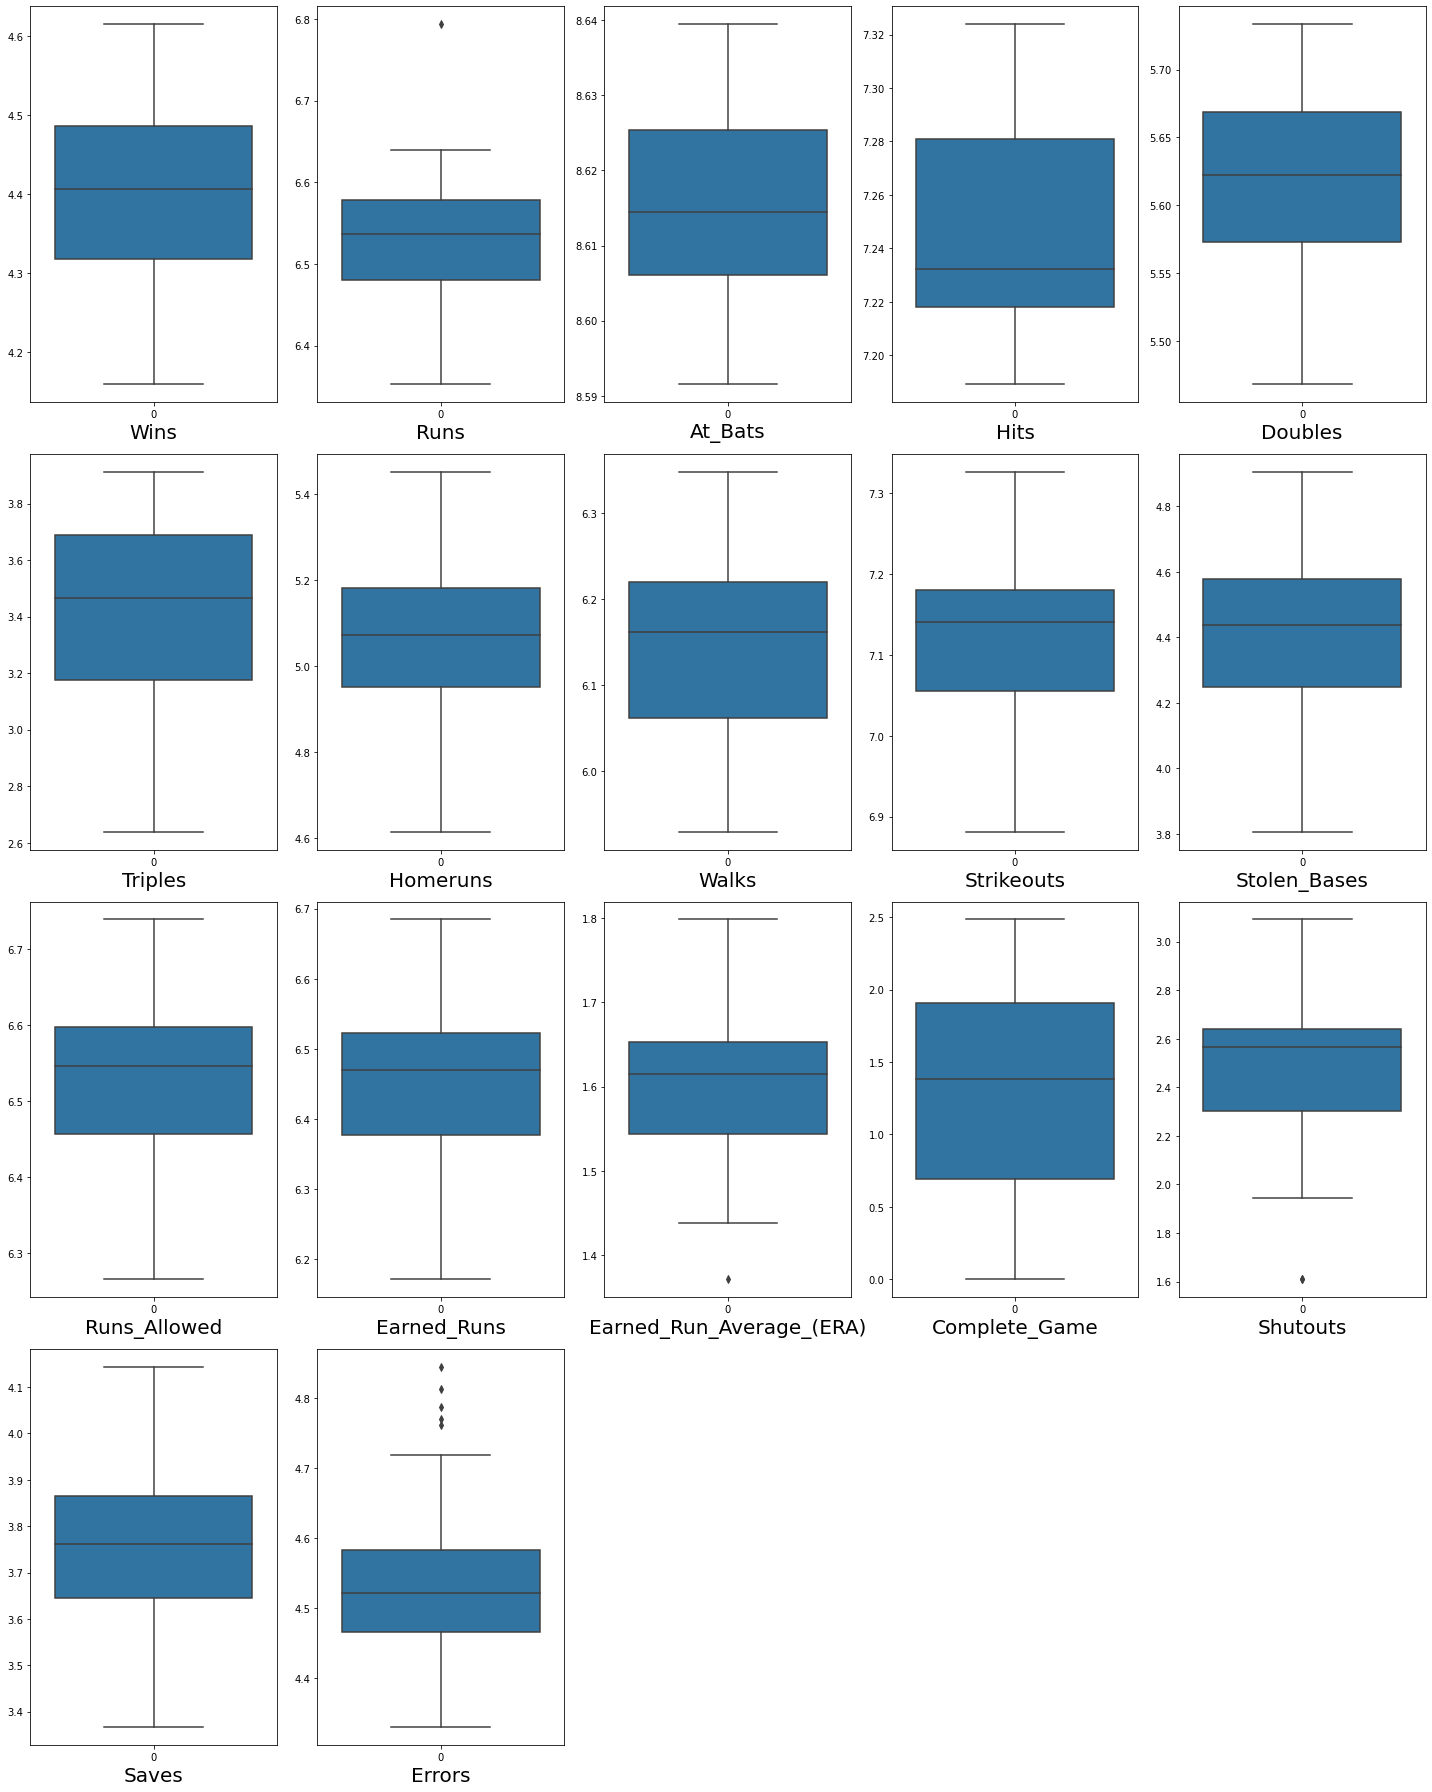

In [163]:
#Visualizartion boxplot for df_cleaned
plt.figure(figsize =(20,25))
plt_num =1
for i in df_cleaned:
    if plt_num<=17:
        ax  =plt.subplot(4,5,plt_num)
        sns.boxplot(data =df_cleaned[i],orient ='v')
        plt.xlabel(i, fontsize =20)
    plt_num +=1
plt.tight_layout()

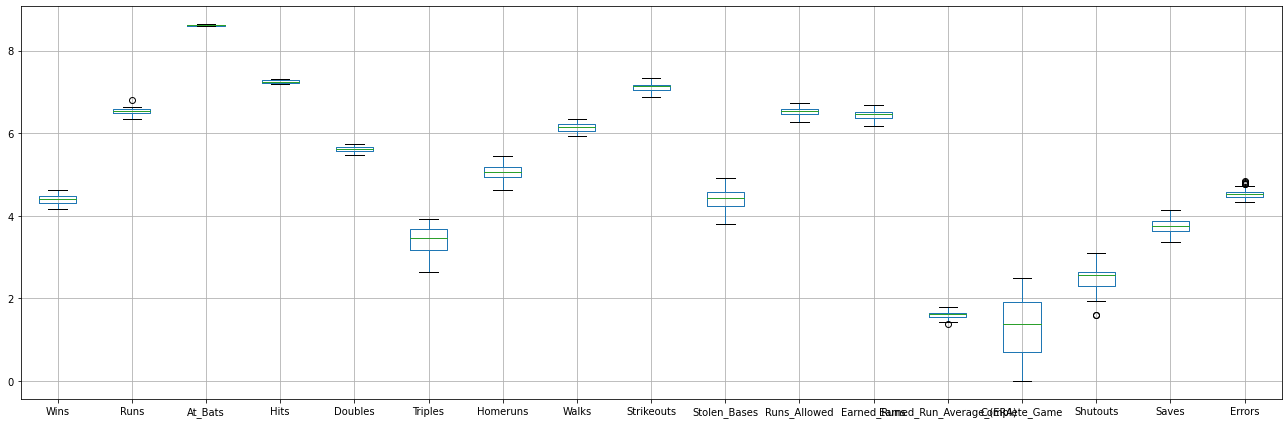

In [164]:
# let's do a complete dataset box plot with the transformed data.
plt.figure(figsize=(18,6))
df_cleaned.boxplot()
plt.tight_layout()

<AxesSubplot:xlabel='Runs', ylabel='Wins'>

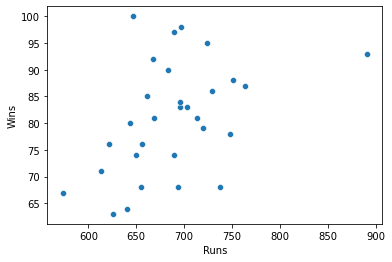

In [165]:
# relationships 

# Wins vs runs
sns.scatterplot(df.Runs,df.Wins)

<AxesSubplot:xlabel='Errors', ylabel='Wins'>

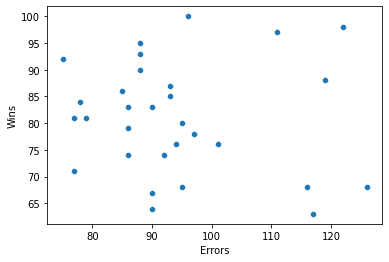

In [166]:
# wins vs erros
sns.scatterplot(df.Errors,df.Wins)

<AxesSubplot:xlabel='Runs_Allowed', ylabel='Runs'>

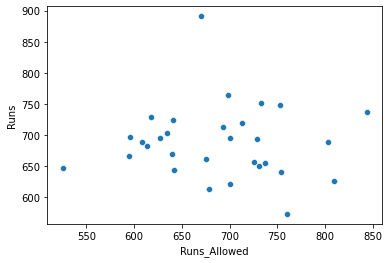

In [167]:
# runs alllowed vs runs scores
sns.scatterplot(df.Runs_Allowed,df.Runs)

##### Modelling
###### we will use the dataframe df_cleaned

In [168]:
df_cleaned.head()

,Wins,Runs,At_Bats,Hits,Doubles,Triples,Homeruns,Walks,Strikeouts,Stolen_Bases,Runs_Allowed,Earned_Runs,Earned_Run_Average_(ERA),Complete_Game,Shutouts,Saves,Errors
0,4.564348,6.586172,8.626227,7.311886,5.707110,3.761200,4.941642,5.950643,6.881411,4.653960,6.464588,6.400257,1.553925,1.098612,2.197225,4.043051,4.488636
1,4.430817,6.546785,8.606668,7.207860,5.627621,3.806662,5.056246,6.086775,7.142827,4.262680,6.552508,6.483107,1.623341,1.098612,2.564949,3.828641,4.465908
2,4.406719,6.507278,8.601534,7.241366,5.717028,3.401197,4.955827,6.280396,7.054450,4.465908,6.463029,6.371612,1.541159,2.484907,2.397895,3.663562,4.382027
3,4.343805,6.434547,8.618666,7.231287,5.564520,3.332205,4.919981,6.003887,7.116394,4.234107,6.553933,6.467699,1.605430,2.079442,2.302585,3.637586,4.624973
4,4.317488,6.536692,8.631593,7.323831,5.669881,3.912023,5.023881,6.122493,7.138867,4.430817,6.689599,6.616065,1.729884,2.079442,2.564949,3.583519,4.465908


In [169]:
# let's drop the the feature with high correlations
df_cleaned.drop(['Runs_Allowed','Earned_Runs'],1,inplace=True)

In [170]:
# Split the features and the target variables into X and y respectively.
x = df_cleaned.drop('Wins',axis=1)
y = df_cleaned['Wins']

In [171]:
# applying standard scaling to the dataframe
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)

In [172]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
my_acc = 0
rs = 0
for i in range (1,100) :
    x_train,x_test,y_train,y_test = train_test_split(x_scaled,y,test_size=.15,random_state=i)   
    lr = LinearRegression()
    lr.fit(x_train,y_train)
    y_pred =lr.predict(x_test)
    acc= r2_score(y_test,y_pred)
    if acc>my_acc :
        my_acc =acc
        rs=i  
rs

6

In [173]:
# train _test split
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x_scaled,y,test_size=0.22,random_state = 42)

In [174]:
#shapes
print ('XTRAIN \n',x_train.shape)
print ('YTRAIN \n',y_train.shape)
print ('XTEST \n',x_test.shape)
print ('YTRAIN \n',y_test.shape)


XTRAIN 
 (23, 14)
YTRAIN 
 (23,)
XTEST 
 (7, 14)
YTRAIN 
 (7,)


In [175]:
# import ML trained 
from sklearn.linear_model import LinearRegression,Ridge,Lasso,ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor,AdaBoostRegressor

In [176]:
# import the evaluation metrics dependenices
from sklearn.model_selection import cross_val_score
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error

## Modelling with Different Regression Techiniques

### Linear Regression

In [177]:
#Using  Regression models 
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(x_train, y_train)
lr_y_pred = lr.predict(x_test)
R2_lr_score =r2_score(y_test,lr_y_pred)

print('R2_SCORE:',R2_lr_score)
print('Mean Absolute Error_LR:',mean_absolute_error(y_test,lr_y_pred))
print('Mean Squared Error_LR:', mean_squared_error(y_test,lr_y_pred))
print('Root Mean Squared Error_LR:', np.sqrt(mean_squared_error(y_test,lr_y_pred)))

R2_SCORE: 0.8693332554372704
Mean Absolute Error_LR: 0.039359882338996045
Mean Squared Error_LR: 0.002243332452818958
Root Mean Squared Error_LR: 0.04736383063920145


### X-Gradient Boosting

In [178]:
#Using  XGB models 
import xgboost as  xgb
xgb = xgb.XGBRegressor()
xgb.fit(x_train,y_train)
xgb_y_pred = xgb.predict(x_test)
R2_xgb_score =r2_score(y_test,xgb_y_pred)
R2_xgb_score
print('R2_SCORE:',R2_xgb_score)
print('Mean Absolute Error_XGB:',mean_absolute_error(y_test,xgb_y_pred))
print('Mean Squared Error_XGB:', mean_squared_error(y_test,xgb_y_pred))
print('Root Mean Squared Error_XGB:', np.sqrt(mean_squared_error(y_test,xgb_y_pred)))

R2_SCORE: 0.67156046094399
Mean Absolute Error_XGB: 0.05389674989781236
Mean Squared Error_XGB: 0.00563876508302791
Root Mean Squared Error_XGB: 0.07509171114728914


### Decision Tree Regressior

In [179]:
from sklearn.tree import DecisionTreeRegressor
dt = DecisionTreeRegressor()
dt.fit(x_train,y_train)
y_pred_dt =dt.predict(x_test)
R2_DT_score =r2_score(y_test,y_pred_dt)
print('R2_SCORE_DT:',R2_DT_score)
print('Mean Absolute Error_DT:',mean_absolute_error(y_test,y_pred_dt))
print('Mean Squared Error_DT:', mean_squared_error(y_test,y_pred_dt))
print('Root Mean Squared Error_DT:', np.sqrt(mean_squared_error(y_test,y_pred_dt)))

R2_SCORE_DT: 0.4548813514215605
Mean Absolute Error_DT: 0.0858824414972595
Mean Squared Error_DT: 0.009358787953929264
Root Mean Squared Error_DT: 0.09674082878458952


### Support Vector  Regressior

In [180]:
# USING SVM Regression
from sklearn.svm import SVR
svr = SVR()
svr.fit(x_train, y_train)
svr_y_pred = svr.predict(x_test)
R2_svr_score =r2_score(y_test,svr_y_pred)
R2_svr_score
print('R2_SCORE:',R2_svr_score)
print('Mean Absolute Error_LR:',mean_absolute_error(y_test,svr_y_pred))
print('Mean Squared Error_LR:', mean_squared_error(y_test,svr_y_pred))
print('Root Mean Squared Error_LR:', np.sqrt(mean_squared_error(y_test,svr_y_pred)))

R2_SCORE: 0.2793192539090913
Mean Absolute Error_LR: 0.0807112236404141
Mean Squared Error_LR: 0.012372899556331775
Root Mean Squared Error_LR: 0.11123353611358301


### Ridge

In [181]:
#Using  RIDGE models 
from sklearn.linear_model import Ridge
rdg = Ridge(alpha=0.001)
rdg.fit(x_train, y_train)
rdg_y_pred = lr.predict(x_test)
R2_rdg_score =r2_score(y_test,rdg_y_pred)

print('R2_SCORE:',R2_lr_score)
print('Mean Absolute Error_LR:',mean_absolute_error(y_test,rdg_y_pred))
print('Mean Squared Error_LR:', mean_squared_error(y_test,rdg_y_pred))
print('Root Mean Squared Error_LR:', np.sqrt(mean_squared_error(y_test,rdg_y_pred)))

R2_SCORE: 0.8693332554372704
Mean Absolute Error_LR: 0.039359882338996045
Mean Squared Error_LR: 0.002243332452818958
Root Mean Squared Error_LR: 0.04736383063920145


### Lasso

In [182]:
#Using  LAsso model
from sklearn.linear_model import Lasso
lass = Lasso(alpha=0.00003)
lass.fit(x_train, y_train)
lass_y_pred = lr.predict(x_test)
R2_lass_score =r2_score(y_test,lass_y_pred)

print('R2_SCORE:',R2_lr_score)
print('Mean Absolute Error_LR:',mean_absolute_error(y_test,lass_y_pred))
print('Mean Squared Error_LR:', mean_squared_error(y_test,lass_y_pred))
print('Root Mean Squared Error_LR:', np.sqrt(mean_squared_error(y_test,lass_y_pred)))


R2_SCORE: 0.8693332554372704
Mean Absolute Error_LR: 0.039359882338996045
Mean Squared Error_LR: 0.002243332452818958
Root Mean Squared Error_LR: 0.04736383063920145


### Running Cross Validation 

In [183]:
#Cross Validation 
cvLR =cross_val_score(lr,x,y,cv=5)
cvXGB =cross_val_score(xgb,x,y,cv=5)
cvSVR=cross_val_score(svr,x,y,cv=5)
cvDTR=cross_val_score(dt,x,y,cv=5)
cdRDG=cross_val_score(rdg,x,y,cv=5)
cdLasso=cross_val_score(lass,x,y,cv=5)
print ('\n CV score LR',cvLR.mean())
print ('\n CV score XGB',cvXGB.mean())
print ('\n CV score SVR',cvSVR.mean())
print ('\n CV score DTR',cvDTR.mean())
print ('\n CV score Ridge',cdRDG.mean())
print ('\n CV score LAsso',cdLasso.mean())


 CV score LR 0.4979372169424515

 CV score XGB -0.795818159415053

 CV score SVR -0.5660013689521258

 CV score DTR -1.8493389881398852

 CV score Ridge 0.5600009865025541

 CV score LAsso 0.5978972889672767


In [184]:
#let's create the models dataframe
models = [LinearRegression(),Ridge(alpha=0.001),Lasso(alpha=0.0003),SVR(),DecisionTreeRegressor()]
model_names = 'Linear|Ridge|Lasso|SVR|Descision_Tree'.split('|')
Models_Stats = pd.DataFrame(columns=['Model','MSE','R2','meanCV'])
for model,model_names in zip(models,model_names):
    print(model)
    
    model.fit(x_train,y_train)
    
    y_preds = model.predict(x_test)
    
    mse = mean_squared_error(y_test,y_preds)
    r2 = r2_score(y_test,y_preds)
    avgCV = np.mean(cross_val_score(model,x,y,scoring='r2'))
    
    
    Models_Stats = Models_Stats.append({'Model':model_names,'MSE':mse,'R2':r2,'meanCV':avgCV},ignore_index=True)
Models_Stats

LinearRegression()
Ridge(alpha=0.001)
Lasso(alpha=0.0003)
SVR()
DecisionTreeRegressor()


,Model,MSE,R2,meanCV
0,Linear,0.002243,0.869333,0.497937
1,Ridge,0.002245,0.869262,0.560001
2,Lasso,0.002364,0.862331,0.611066
3,SVR,0.012373,0.279319,-0.566001
4,Descision_Tree,0.008224,0.520998,-2.292705


### Linier  REGRESSON is the best one 
## HYPER PARAMETER TUNING TO BE DONE on Linear Regresssion

In [185]:
LinearRegression().get_params().keys()

dict_keys(['copy_X', 'fit_intercept', 'n_jobs', 'normalize', 'positive'])

In [186]:
from sklearn.model_selection import GridSearchCV

param ={'copy_X' :[True] ,'n_jobs' : [1,2], 'normalize' :[False]}
GSV = GridSearchCV(LinearRegression(),param,cv=5)
GSV.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=LinearRegression(),
             param_grid={'copy_X': [True], 'n_jobs': [1, 2],
                         'normalize': [False]})

In [187]:
GSV.best_params_

{'copy_X': True, 'n_jobs': 1, 'normalize': False}

### Modelling Using best parameters

In [190]:
#Using  Regression models 
from sklearn.linear_model import LinearRegression
lr_HT = LinearRegression(copy_X =True, n_jobs= 2, normalize=False)
lr_HT.fit(x_train, y_train)
lr_HT_y_pred =lr_HT.predict(x_test)
R2_lr_HT_score =r2_score(y_test,lr_HT_y_pred)

print('R2_SCORE:',R2_lr_HT_score)
print('Mean Absolute Error_LR:',mean_absolute_error(y_test,lr_HT_y_pred))
print('Mean Squared Error_LR:', mean_squared_error(y_test,lr_HT_y_pred))
print('Root Mean Squared Error_LR:', np.sqrt(mean_squared_error(y_test,lr_HT_y_pred)))

R2_SCORE: 0.8693332554372704
Mean Absolute Error_LR: 0.039359882338996045
Mean Squared Error_LR: 0.002243332452818958
Root Mean Squared Error_LR: 0.04736383063920145


### EFFICIANCY ACHIEVED 

R2_SCORE: 0.8693332554372704
Mean Absolute Error_LR: 0.039359882338996045
Mean Squared Error_LR: 0.002243332452818958
Root Mean Squared Error_LR: 0.04736383063920145

In [192]:
#Checking efficiancy in random 

print(lr_HT_y_pred[:50],)
print(lr_y_pred[:50],)
print(y_test[:50].values)


[4.41388937 4.65757104 4.2545316  4.55691211 4.49442951 4.39714155
 4.30703551]
[4.41388937 4.65757104 4.2545316  4.55691211 4.49442951 4.39714155
 4.30703551]
[4.38202663 4.61512052 4.21950771 4.58496748 4.39444915 4.36944785
 4.31748811]


### Saving the model

In [193]:
#Dumping the model 
import joblib as jl
jl.dump(lr_HT,'Baseball_case_study.pk')

['Baseball_case_study.pk']

In [194]:
#Loading Model
lrhyp = jl.load('Baseball_case_study.pk')

In [195]:
Y_lrhyp = lrhyp.predict(x_test)